In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np
from AnalysisUtils.analysis_utils import *

In [40]:
%%time
rc_df = pd.read_csv("../data/rc_bbdyw.csv")
rc_df.columns=["open_date", "close_date", "symbol", "action",
                 "lots", "sl", "tp", "open_price", "close_price",
                 "pips", "profits", "Duration", "Change"]
rc_df["open_date"] = pd.to_datetime(rc_df["open_date"])
rc_df["close_date"] = pd.to_datetime(rc_df["close_date"])
def str2float(row):
    if "," in row:
        return float(row.split(",")[0] + row.split(",")[1])
    return float(row)
rc_df["pips"] = rc_df["pips"].apply(str2float)
rc_df["profits"] = rc_df["profits"].apply(str2float)
rc_df = rc_df.iloc[::-1]
rc_df.head()

CPU times: user 513 ms, sys: 0 ns, total: 513 ms
Wall time: 512 ms


,open_date,close_date,symbol,action,lots,sl,tp,open_price,close_price,pips,profits,Duration,Change
7446,2021-06-28 03:39:00,2021-06-28 03:41:00,XAUUSD,Buy,0.38,0,0,1772.23000,1772.880,6.5,24.70,0,0
7445,2021-06-25 15:10:00,2021-06-28 03:41:00,XAUUSD,Sell,0.28,0,0,1789.18000,1772.930,162.5,455.00,0,0
7444,2021-06-25 15:25:00,2021-06-28 03:44:00,XAUUSD,Sell,0.28,0,0,1787.99000,1770.970,170.2,476.56,0,0
7443,2021-06-25 16:19:00,2021-06-28 04:01:00,GBPUSD,Sell,0.28,0,0,1.39251,1.388,45.1,126.28,0,0
7442,2021-06-28 04:50:00,2021-06-28 10:16:00,XAUUSD,Sell,0.44,0,0,1778.01000,1778.000,0.1,0.44,0,0


In [41]:
rc_df["symbol"].unique()

array(['XAUUSD', 'GBPUSD', 'USDCAD', 'USTEC', 'US30', 'XAGUSD', 'HK50',
       'GBPJPY', 'SPX500'], dtype=object)

<AxesSubplot:>

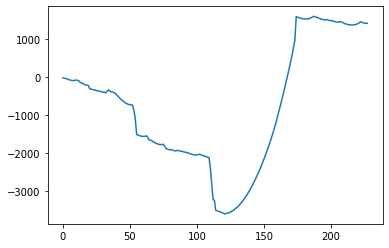

In [55]:
ana_df = rc_df[rc_df["symbol"]=="USTEC"]
ana_df = ana_df[(ana_df["close_date"]>=pd.to_datetime("2021-11-16 00:00:00")) 
               & (ana_df["close_date"]<=pd.to_datetime("2021-11-23 23:59:00"))]\
               .reset_index(drop=True)
ana_df["profits"].cumsum().plot()

<AxesSubplot:>

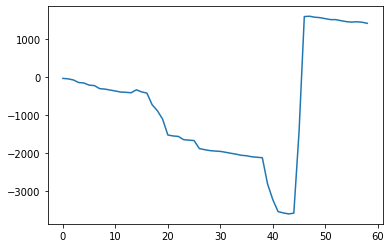

In [56]:
ana_grp_df = ana_df.groupby(by=["symbol", "action", "close_date"])\
                   .agg({"profits":"sum", "pips":"count", "lots":"sum"})\
                   .sort_values("close_date")\
                   .reset_index()
ana_grp_df["profits"].cumsum().plot()

In [58]:
ana_grp_df

,symbol,action,close_date,profits,pips,lots
0,USTEC,Sell,2021-11-16 13:31:00,-25.69,3,1.2
1,USTEC,Sell,2021-11-16 15:41:00,-12.16,1,0.4
2,USTEC,Sell,2021-11-16 16:32:00,-29.32,7,2.8
3,USTEC,Sell,2021-11-16 16:35:00,-67.17,3,2.4
4,USTEC,Sell,2021-11-16 16:36:00,-12.19,1,0.4
5,USTEC,Sell,2021-11-16 18:04:00,-56.60,4,1.6
6,USTEC,Sell,2021-11-16 18:15:00,-11.97,1,0.4
7,USTEC,Sell,2021-11-16 18:21:00,-80.04,1,1.0
8,USTEC,Sell,2021-11-16 20:59:00,-12.20,1,0.4
9,USTEC,Sell,2021-11-16 22:32:00,-25.24,3,1.2


In [ ]:
ana_df[ana_df["symbol"] == "XAUUSD"].sort_values("profits")

In [ ]:
pd.__version__

In [ ]:
4 + 3 + 2 + 1

In [ ]:
7 + 6 + 5 + 4 + 3 + 2 + 1

In [59]:
3 * 1

3

In [69]:
n = 36
3 * 1 + 1 * (n-1) / 2 

20.5